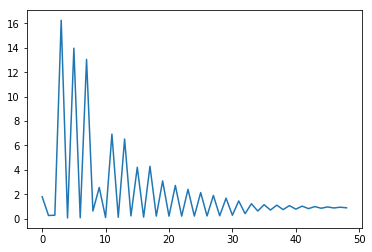

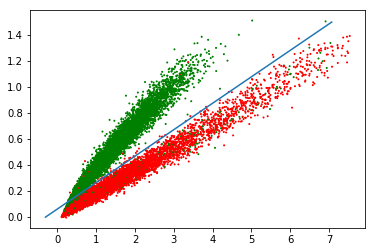

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

nuclear_x = pd.read_csv("nuclear_x.csv", header=None)
nuclear_x.columns = [1,2]
nuclear_x = pd.concat([pd.DataFrame(np.ones((20000, 1))), nuclear_x], axis=1)
nuclear_y = pd.read_csv("nuclear_y.csv", header=None)
nuclear_y.columns = [3]
nuclear = pd.concat([nuclear_x, nuclear_y], axis=1)

data_size = 20000
iterations = 50
nuclear = nuclear.head(data_size)

color = nuclear.apply(lambda row: 'red' if row[3] == -1 else 'green', axis=1).values

theta = np.random.normal(0, 1, 3)
l = 0.001


def get_j():
    j = 0
    for index, row in nuclear.iterrows():
        j = j + np.max([row[3], np.dot(theta, row[:-1])])
    return j/data_size + l/2 * np.dot(theta[1:], theta[1:])


def get_subg():
    subg = 0
    for index, row in nuclear.iterrows():
        theta_wo_bias = np.copy(theta)
        theta_wo_bias[0] = 0
        if 1 - row[3] * np.dot(theta, row[:-1]) > 0:
            subg = subg + l * theta_wo_bias - row[3] * row[:-1]
        else:
            subg = subg + l * theta_wo_bias
    return subg/data_size


plot_l = []
for loop_i in np.arange(1, iterations, 1):
    theta = theta - 100/loop_i * get_subg()
    plot_l.append(get_j())

plt.plot(plot_l)
plt.show()

plt.scatter(nuclear[1], nuclear[2], color=color, s=1)
plt.plot([-theta[0]/theta[1], -1.5 * theta[2]/theta[1] - theta[0]/theta[1]], [0, 1.5])
plt.show()

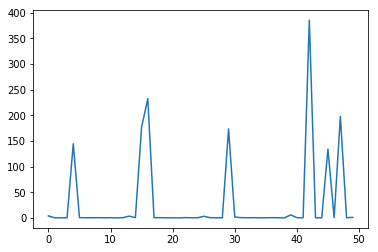

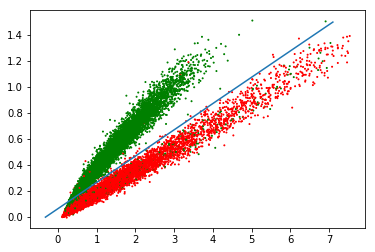

In [67]:
# Beginning of Stochastic Gradient Method
theta = np.random.normal(0, 1, 3)
l = 0.001
iterations = iterations * data_size


def get_stochastic_subg():
    stochastic_subg = 0
    row = nuclear.iloc[np.random.randint(0, data_size)]
    theta_wo_bias = np.copy(theta)
    theta_wo_bias[0] = 0
    if 1 - row[3] * np.dot(theta, row[:-1]) > 0:
        stochastic_subg = stochastic_subg + l * theta_wo_bias - row[3] * row[:-1]
    else:
        stochastic_subg = stochastic_subg + l * theta_wo_bias
    return stochastic_subg


plot_l = []
for loop_i in np.arange(1, iterations, 1):
    if (loop_i - 1) % data_size == 0:
        plot_l.append(get_j())
    theta = theta - 100/(loop_i%data_size + 1) * get_stochastic_subg()

plt.plot(plot_l)
plt.show()

plt.scatter(nuclear[1], nuclear[2], color=color, s=1)
plt.plot([-theta[0]/theta[1], -1.5 * theta[2]/theta[1] - theta[0]/theta[1]], [0, 1.5])
plt.show()